<a href="https://colab.research.google.com/github/jaguzman/FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%204%20-%20Interacci%C3%B3n%20Hombre%20M%C3%A1quina/2_Reconocimiento%20del%20habla/CNN_reconocimiento_habla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reconocimiento de audio usando redes neuronales**

In [ ]:
#Descomprimimos el archivo en carpetas
import os
import zipfile

file = 'train.zip'
zip = zipfile.ZipFile(file, 'r')
zip.extractall('/train')
zip.close()

In [ ]:
os.listdir('/train')

['dog', 'house', 'happy', 'cat']

In [ ]:
labels = os.listdir('/train')

In [ ]:
cats = os.listdir(train_audio_path + '/cat')[:10]
cats

['1ecfb537_nohash_0.wav',
 '3efef882_nohash_1.wav',
 '05cf43ef_nohash_0.wav',
 '1fd85ee4_nohash_0.wav',
 '1df483c0_nohash_1.wav',
 '6d0ad764_nohash_0.wav',
 '7d8babdb_nohash_0.wav',
 '1b459024_nohash_0.wav',
 '3d3ddaf8_nohash_0.wav',
 '4abefdf5_nohash_1.wav']

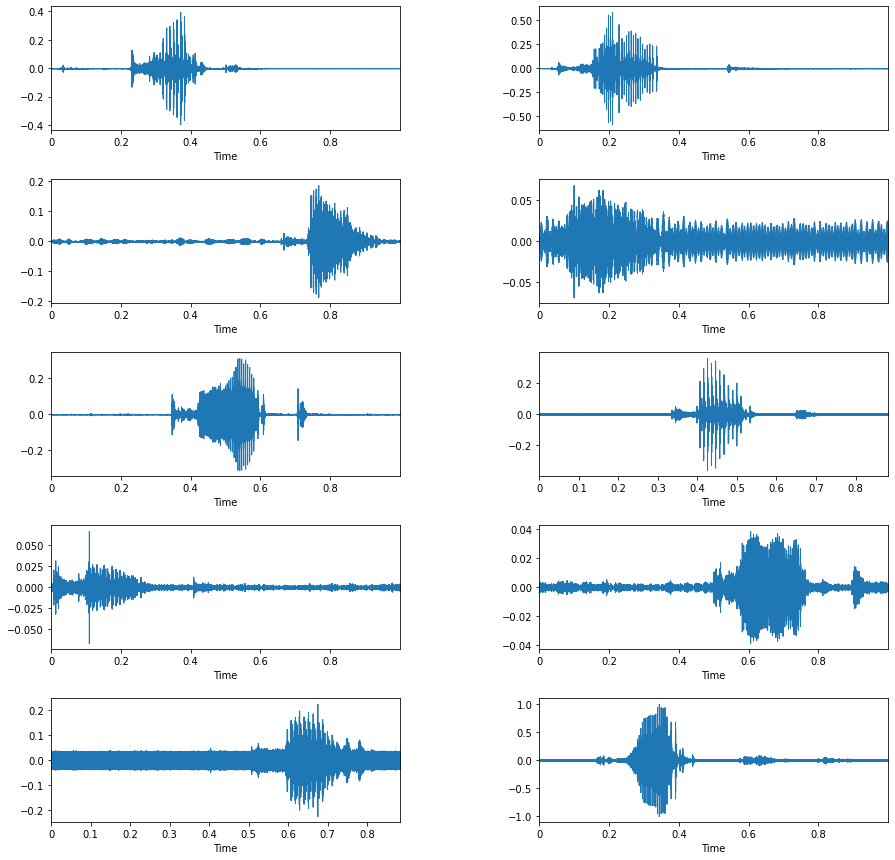

In [ ]:
import librosa
import librosa.display

train_audio_path = '/train'

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, file in enumerate(cats):
  fig.add_subplot(5, 2, i+1)
  data, sample_rate = librosa.load(train_audio_path + '/cat/' + file)
  librosa.display.waveplot(data, sr= sample_rate)

In [ ]:
all_wave = []
all_label = []
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        print("LABEL ", label, " WAV ", wav)
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

LABEL  dog  WAV  6d0ad764_nohash_1.wav
LABEL  dog  WAV  1d919a90_nohash_1.wav
LABEL  dog  WAV  1ecfb537_nohash_0.wav
LABEL  dog  WAV  1c3f50ad_nohash_2.wav
LABEL  dog  WAV  1fd85ee4_nohash_0.wav
LABEL  dog  WAV  4cb874bb_nohash_0.wav
LABEL  dog  WAV  6d0ad764_nohash_0.wav
LABEL  dog  WAV  3ca784ec_nohash_1.wav
LABEL  dog  WAV  1a073312_nohash_1.wav
LABEL  dog  WAV  1b459024_nohash_0.wav
LABEL  dog  WAV  6f7724f5_nohash_3.wav
LABEL  dog  WAV  3d3ddaf8_nohash_0.wav
LABEL  dog  WAV  03cf93b1_nohash_1.wav
LABEL  dog  WAV  5ff3f9a1_nohash_2.wav
LABEL  dog  WAV  1bb574f9_nohash_1.wav
LABEL  dog  WAV  3c165869_nohash_0.wav
LABEL  dog  WAV  3efef882_nohash_0.wav
LABEL  dog  WAV  00f0204f_nohash_0.wav
LABEL  dog  WAV  6f2c6f7e_nohash_0.wav
LABEL  dog  WAV  2c7c33e8_nohash_0.wav
LABEL  dog  WAV  4c13fe25_nohash_0.wav
LABEL  dog  WAV  3efa7ec4_nohash_0.wav
LABEL  dog  WAV  3ca784ec_nohash_0.wav
LABEL  dog  WAV  2cf28b70_nohash_1.wav
LABEL  dog  WAV  06a79a03_nohash_0.wav
LABEL  dog  WAV  00f0204f

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_enconder = LabelEncoder()
y = label_enconder.fit_transform(all_label)
classes = list(label_enconder.classes_)
y = to_categorical(y, num_classes=len(labels))

In [ ]:
y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
all_wave

[array([-0.08772947, -0.20636082, -0.2330173 , ..., -0.17369829,
        -0.1634268 , -0.17080188], dtype=float32),
 array([ 4.9953302e-05, -3.7284881e-05, -6.5388951e-05, ...,
        -7.5648808e-05, -2.4397614e-05, -7.3896859e-05], dtype=float32),
 array([ 2.2172489e-05,  2.7772994e-04,  6.5934320e-04, ...,
        -1.3035724e-03, -9.2649797e-04, -4.8011859e-04], dtype=float32),
 array([ 0.00258078,  0.00458987,  0.00518001, ..., -0.00641486,
        -0.00558136, -0.00500095], dtype=float32),
 array([-0.02117577, -0.03976354, -0.0298651 , ..., -0.03127645,
        -0.03030995, -0.03325732], dtype=float32),
 array([-0.00020105, -0.00064894, -0.0009967 , ...,  0.0008497 ,
         0.0010618 ,  0.00089237], dtype=float32),
 array([-1.77763231e-05, -6.97095165e-05, -1.12612186e-04, ...,
         7.30921165e-05,  1.04315870e-04,  6.78183133e-05], dtype=float32),
 array([0.00037196, 0.00022283, 0.00109327, ..., 0.00145806, 0.00137768,
        0.00100041], dtype=float32),
 array([0.02529265

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

print("Train: ", x_train.shape, " ", y_train.shape)
print("Test: ", x_test.shape, " ", y_test.shape)


Train:  (748, 8000)   (748, 4)
Test:  (188, 8000)   (188, 4)


In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)          

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
                  epochs=20, 
                  batch_size=32, 
                  validation_data=(x_test,y_test))

Epoch 1/100
24/24 [==============================] - 5s 219ms/step - loss: 0.1024 - accuracy: 0.9706 - val_loss: 0.3308 - val_accuracy: 0.8989
Epoch 2/100
24/24 [==============================] - 5s 220ms/step - loss: 0.0879 - accuracy: 0.9746 - val_loss: 0.3564 - val_accuracy: 0.8936
Epoch 3/100
24/24 [==============================] - 5s 218ms/step - loss: 0.0790 - accuracy: 0.9719 - val_loss: 0.3269 - val_accuracy: 0.9096
Epoch 4/100
24/24 [==============================] - 5s 219ms/step - loss: 0.0734 - accuracy: 0.9759 - val_loss: 0.3468 - val_accuracy: 0.9149
Epoch 5/100
24/24 [==============================] - 5s 218ms/step - loss: 0.0693 - accuracy: 0.9733 - val_loss: 0.4148 - val_accuracy: 0.9043
Epoch 6/100
24/24 [==============================] - 5s 215ms/step - loss: 0.0964 - accuracy: 0.9639 - val_loss: 0.4850 - val_accuracy: 0.8883
Epoch 7/100
24/24 [==============================] - 5s 220ms/step - loss: 0.0846 - accuracy: 0.9693 - val_loss: 0.3869 - val_accuracy: 0.9362

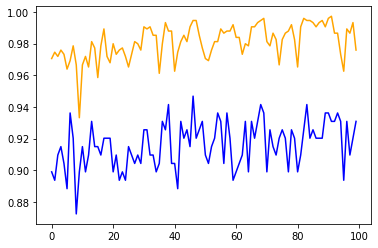

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train', color='orange') 
plt.plot(history.history['val_accuracy'], label='test', color='blue') 
plt.show()

In [ ]:
file = 'test.zip'
zip = zipfile.ZipFile(file, 'r')
zip.extractall('/prueba')
zip.close()

In [ ]:
testFiles = os.listdir('/prueba')
testFiles

['bed06fac_nohash_0-hy.wav',
 'ff21fb59_nohash_1-ct.wav',
 'edc53350_nohash_0-hs.wav',
 'bf5d409d_nohash_1-hy.wav',
 '0d53e045_nohash_1-dg.wav',
 'efbc3952_nohash_0-hs.wav',
 'ec7d1151_nohash_0-dg.wav',
 'ff21fb59_nohash_0-ct.wav']

In [ ]:
waves_test = []
files_processed = []

for file in testFiles:    
  samples, sample_rate = librosa.load('/prueba/' + file, sr = 16000)
  samples = librosa.resample(samples, sample_rate, 8000)
  if (len(samples)== 8000) : 
    waves_test.append(samples)
    files_processed.append(file)

print(waves_test)
print(files_processed)

[array([-0.01173613, -0.02698218, -0.02756078, ..., -0.01788949,
       -0.01735707, -0.01819562], dtype=float32), array([-0.00484965, -0.01160931, -0.01166675, ..., -0.00034852,
       -0.00217514, -0.01018853], dtype=float32), array([ 0.00064304,  0.00019744, -0.00037367, ...,  0.00134052,
        0.00119777,  0.00150671], dtype=float32), array([ 0.00021374, -0.00291358, -0.00554987, ...,  0.01023723,
        0.00496682,  0.00392877], dtype=float32), array([-4.4966939e-05,  3.5205990e-04,  6.5443257e-04, ...,
        1.5777720e-02,  1.5008168e-02,  1.6211810e-02], dtype=float32), array([-0.00091303, -0.00141014, -0.00011687, ..., -0.00123981,
       -0.00125309, -0.00124288], dtype=float32), array([-0.00392976, -0.01212565, -0.01483617, ..., -0.01090576,
       -0.00722229, -0.00484156], dtype=float32)]
['bed06fac_nohash_0-hy.wav', 'ff21fb59_nohash_1-ct.wav', 'bf5d409d_nohash_1-hy.wav', '0d53e045_nohash_1-dg.wav', 'efbc3952_nohash_0-hs.wav', 'ec7d1151_nohash_0-dg.wav', 'ff21fb59_noha

In [ ]:
predict = model.predict(np.array(waves_test))
predict

array([[5.83734838e-10, 5.87981390e-07, 9.99999404e-01, 6.73007787e-12],
       [9.97651398e-01, 5.12165891e-04, 1.80318858e-03, 3.33421340e-05],
       [3.72755789e-24, 4.71814330e-21, 1.00000000e+00, 1.91651469e-24],
       [5.11022881e-05, 9.99741733e-01, 4.70609575e-06, 2.02469033e-04],
       [3.06488469e-16, 8.57242125e-11, 1.69838177e-20, 1.00000000e+00],
       [1.06982165e-08, 9.99518156e-01, 2.84490098e-09, 4.81816620e-04],
       [1.00000000e+00, 5.79496340e-10, 1.09414495e-08, 3.39616790e-13]],
      dtype=float32)

In [ ]:
clases = ['cat', 'dog', 'happy', 'house']

In [ ]:
test = list()
for i in range(len(predict)):
    test.append(clases[np.argmax(predict[i])])
test

['happy', 'cat', 'happy', 'dog', 'house', 'dog', 'cat']

In [ ]:
files_processed

['bed06fac_nohash_0-hy.wav',
 'ff21fb59_nohash_1-ct.wav',
 'bf5d409d_nohash_1-hy.wav',
 '0d53e045_nohash_1-dg.wav',
 'efbc3952_nohash_0-hs.wav',
 'ec7d1151_nohash_0-dg.wav',
 'ff21fb59_nohash_0-ct.wav']